<a href="https://colab.research.google.com/github/Staffilon/KestraDataOrchestrator/blob/main/Analysis_and_Exploration/quality_production_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd "gdrive/MyDrive/Dati-TBDM/refined_data"

/content/gdrive/.shortcut-targets-by-id/1xGTanGyuk-TCLCMoGz5VNG7sUEscVC-Z/Dati-TBDM/refined_data


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

STOP CODES which can be connected to machine problems

In [5]:
energy_fermate_merged = pd.read_csv("energy_fermate_merged.csv")

# Stop_Code which could show some problems with the machine
filtered_data = energy_fermate_merged[
    (energy_fermate_merged['STOP_CODE'] == 4) |    # manutenzione ordinaria
    (energy_fermate_merged['STOP_CODE'] == 8) |    # affilatura utensile
    (energy_fermate_merged['STOP_CODE'] == 9) |    # manutenzione straordinaria
    (energy_fermate_merged['STOP_CODE'] == 10)     # sostituzione utensile
]

# Average the quality for any stop code

Calculate the average of good quality and scrap quality for any stop code

In [6]:
energy_value_stats = energy_fermate_merged.groupby('STOP_CODE').agg({
    'STOP_CODE': 'count',
    'DESFERM': 'first',
    'QTY_GOOD': 'mean',
    'QTY_SCRAP': 'mean'
}).rename(columns={'STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code', 'QTY_GOOD': 'Avg Good Quality', 'QTY_SCRAP': 'Avg Scrap Quality',})

pd.set_option('display.expand_frame_repr', False)

print(energy_value_stats)

           Entries Count                     Description Stop_Code  Avg Good Quality  Avg Scrap Quality
STOP_CODE                                                                                              
0                  30756  Indeterminata                                    -0.028125           0.227175
1                   7787  Avviamento                                       -0.740593           0.966226
2                   1392  Attrezzaggio                                      0.010776           0.124282
4                   2316  Manutenzione ordinaria                           -1.924870           2.072539
6                    690  Riscaldamento                                     0.042029           0.039130
7                     15  Materia prima assente                             0.066667           0.000000
8                    859  Affilatura utensile                              -0.607683           0.623981
9                    202  Manutenzione straordinaria            

Calculate the average, alongside the average energy levels, for the stop codes with associated energy levels

In [7]:
# Grouping the merged dataframe by STOP_CODE and calculating the average of quality
mask_not_null = energy_fermate_merged['Energy_Value'].notna()
energy_value_stats = energy_fermate_merged[mask_not_null].groupby('STOP_CODE').agg({
    'STOP_CODE': 'count',
    'DESFERM': 'first',
    'QTY_GOOD': 'mean',
    'QTY_SCRAP': 'mean',
    'Energy_Value': 'mean'
}).rename(columns={'STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code', 'QTY_GOOD': 'Avg Good Quality', 'QTY_SCRAP': 'Avg Scrap Quality',
                   'Energy_Value': 'Avg Energy'})

pd.set_option('display.expand_frame_repr', False)

print(energy_value_stats)

           Entries Count                     Description Stop_Code  Avg Good Quality  Avg Scrap Quality   Avg Energy
STOP_CODE                                                                                                           
0                  11590  Indeterminata                                     0.025626           0.209146  3845.794254
1                   2968  Avviamento                                       -1.847709           1.936995  3194.764858
2                    405  Attrezzaggio                                      0.029630           0.049383  1577.617531
4                    723  Manutenzione ordinaria                           -4.496542           4.615491  4474.461272
6                    235  Riscaldamento                                     0.093617           0.000000  3425.416596
7                      5  Materia prima assente                             0.200000           0.000000  2871.340000
8                    359  Affilatura utensile                   

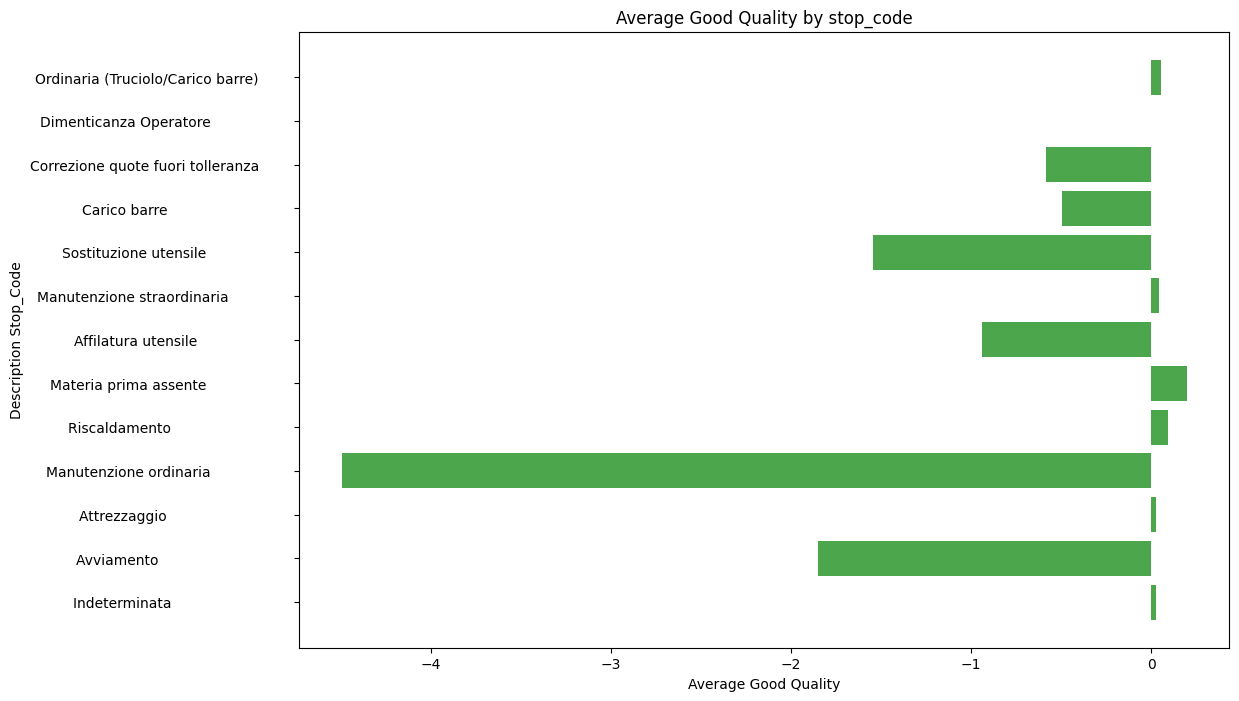

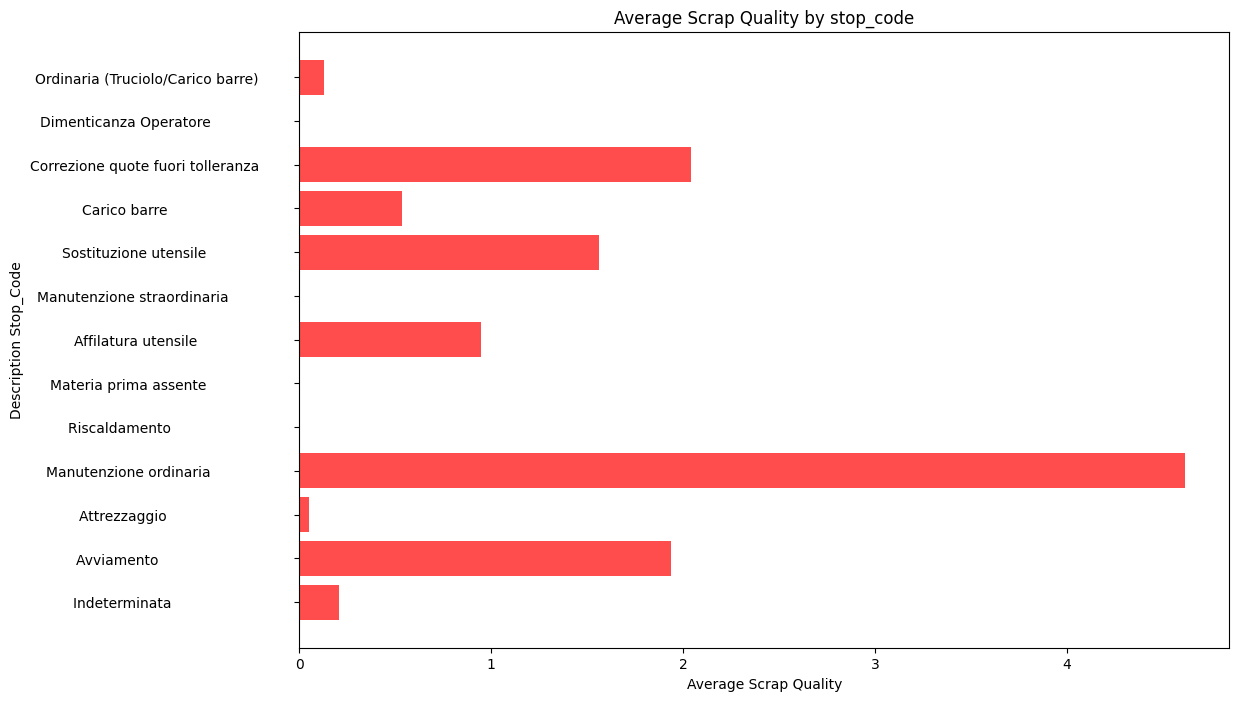

In [19]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', True)

# Create chart for 'Avg Good Quality'
plt.figure(figsize=(12, 8))
#plt.bar(energy_value_stats['Desc'], energy_value_stats['Avg Good Quality'], color='green', alpha=0.7) decidere come mostrare il grafico
plt.barh(energy_value_stats['Description Stop_Code'], energy_value_stats['Avg Good Quality'], color='green', alpha=0.7)

plt.xlabel('Average Good Quality')
plt.ylabel('Description Stop_Code')
plt.title('Average Good Quality by stop_code')
#plt.xticks(rotation=45, ha='right') decidere come mostrare il grafico

plt.show()

# Create chart for 'Avg Scrap Quality'
plt.figure(figsize=(12, 8))
#plt.bar(energy_value_stats['Desc'], energy_value_stats['Avg Scrap Quality'], color='red', alpha=0.7) decidere come mostrare il grafico
plt.barh(energy_value_stats['Description Stop_Code'], energy_value_stats['Avg Scrap Quality'], color='red', alpha=0.7)

plt.xlabel('Average Scrap Quality')
plt.ylabel('Description Stop_Code')
plt.title('Average Scrap Quality by stop_code')
#plt.xticks(rotation=45, ha='right') decidere come mostrare il grafico

plt.show()

#Target stop codes
Average quality for machines with the previously identified stop codes

In [8]:
# Calculate total count of entries in the entire dataset
total_entries_count = energy_fermate_merged['STOP_CODE'].count()
print("Total Entries Count:", total_entries_count)

# Grouping the filtered dataframe by STOP_CODE and calculating the average of quality
filtered_value_stats = filtered_data.groupby('STOP_CODE').agg({
    'STOP_CODE': 'count',
    'DESFERM': 'first',
    'QTY_GOOD': 'mean',
    'QTY_SCRAP': 'mean'
}).rename(columns={'STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code', 'QTY_GOOD': 'Avg Good Quality', 'QTY_SCRAP': 'Avg Scrap Quality'})

# Calculate percentage of entries count for filtered data relative to the entire dataset
filtered_value_stats['Percentage'] = (filtered_value_stats['Entries Count'] / total_entries_count) * 100

pd.set_option('display.expand_frame_repr', False)

# Print the filtered statistics along with percentage column
print(filtered_value_stats)

Total Entries Count: 102827
           Entries Count                     Description Stop_Code  Avg Good Quality  Avg Scrap Quality  Percentage
STOP_CODE                                                                                                          
4                   2316  Manutenzione ordinaria                           -1.924870           2.072539    2.252327
8                    859  Affilatura utensile                              -0.607683           0.623981    0.835384
9                    202  Manutenzione straordinaria                       -3.787129           3.811881    0.196446
10                  5708  Sostituzione utensile                            -2.720918           2.747547    5.551071


In [9]:
# Calculate total count of entries in the entire dataset
total_entries_count = energy_fermate_merged[mask_not_null]['STOP_CODE'].count()
print("Total Entries Count:", total_entries_count)

filtered_mask = filtered_data['Energy_Value'].notna()
# Grouping the filtered dataframe by STOP_CODE and calculating the average of quality
filtered_value_stats = filtered_data[filtered_mask].groupby('STOP_CODE').agg({
    'STOP_CODE': 'count',
    'DESFERM': 'first',
    'QTY_GOOD': 'mean',
    'QTY_SCRAP': 'mean',
    'Energy_Value': 'mean'

}).rename(columns={'STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code', 'QTY_GOOD': 'Avg Good Quality', 'QTY_SCRAP': 'Avg Scrap Quality',
                   'Energy_Value': 'Avg Energy'})

# Calculate percentage of entries count for filtered data relative to the entire dataset
filtered_value_stats['Percentage'] = (filtered_value_stats['Entries Count'] / total_entries_count) * 100

pd.set_option('display.expand_frame_repr', False)

# Print the filtered statistics along with percentage column
print(filtered_value_stats)

Total Entries Count: 31691
           Entries Count                     Description Stop_Code  Avg Good Quality  Avg Scrap Quality   Avg Energy  Percentage
STOP_CODE                                                                                                                       
4                    723  Manutenzione ordinaria                           -4.496542           4.615491  4474.461272    2.281405
8                    359  Affilatura utensile                              -0.938719           0.947075  2350.142618    1.132814
9                     64  Manutenzione straordinaria                        0.046875           0.000000  2112.242188    0.201950
10                  1879  Sostituzione utensile                            -1.542842           1.562001  4302.586535    5.929128


In [14]:
# Filter out rows where the RESOURCE is 108
filtered_data_excluding_108 = filtered_data[filtered_data['RESOURCE'] != 108]

# Calculate total count of entries in the entire dataset
total_entries_count = energy_fermate_merged[mask_not_null]['STOP_CODE'].count()
print("Total Entries Count:", total_entries_count)

# Filter rows where 'Energy_Value' is not NaN
filtered_mask = filtered_data_excluding_108['Energy_Value'].notna()

# Grouping the filtered dataframe by STOP_CODE and calculating the average of quality
filtered_value_stats = filtered_data_excluding_108[filtered_mask].groupby('STOP_CODE').agg({
    'STOP_CODE': 'count',
    'DESFERM': 'first',
    'QTY_GOOD': 'mean',
    'QTY_SCRAP': 'mean',
    'Energy_Value': 'mean'
}).rename(columns={'STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code', 'QTY_GOOD': 'Avg Good Quality', 'QTY_SCRAP': 'Avg Scrap Quality',
                   'Energy_Value': 'Avg Energy'})

# Calculate percentage of entries count for filtered data relative to the entire dataset
filtered_value_stats['Percentage'] = (filtered_value_stats['Entries Count'] / total_entries_count) * 100

pd.set_option('display.expand_frame_repr', False)

# Print the filtered statistics along with percentage column
print(filtered_value_stats)


Total Entries Count: 31691
           Entries Count                     Description Stop_Code  Avg Good Quality  Avg Scrap Quality   Avg Energy  Percentage
STOP_CODE                                                                                                                       
4                    686  Manutenzione ordinaria                           -3.800292           3.916910  4715.285423    2.164652
8                    339  Affilatura utensile                              -0.994100           1.002950  2488.327434    1.069704
9                     58  Manutenzione straordinaria                        0.017241           0.000000  2327.929310    0.183017
10                  1784  Sostituzione utensile                            -1.626682           1.645179  4531.007904    5.629358


In [11]:
# Calculate total count of entries in the entire dataset
total_entries_count = energy_fermate_merged[mask_not_null]['STOP_CODE'].count()
print("Total Entries Count:", total_entries_count)

filtered_mask = filtered_data['Energy_Value'].notna()
# Grouping the filtered dataframe by STOP_CODE and calculating the average of quality
filtered_value_stats = filtered_data[filtered_mask].groupby(['RESOURCE', 'STOP_CODE']).agg({
    'STOP_CODE': 'count',
    'DESFERM': 'first',
    'QTY_GOOD': 'mean',
    'QTY_SCRAP': 'mean',
    'Energy_Value': 'mean'

}).rename(columns={'STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code', 'QTY_GOOD': 'Avg Good Quality', 'QTY_SCRAP': 'Avg Scrap Quality',
                   'Energy_Value': 'Avg Energy'})

# Calculate percentage of entries count for filtered data relative to the entire dataset
filtered_value_stats['Percentage'] = (filtered_value_stats['Entries Count'] / total_entries_count) * 100

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)

# Print the filtered statistics along with percentage column
print(filtered_value_stats)

Total Entries Count: 31691
                    Entries Count                     Description Stop_Code  Avg Good Quality  Avg Scrap Quality    Avg Energy  Percentage
RESOURCE STOP_CODE                                                                                                                        
108      4                     37  Manutenzione ordinaria                          -17.405405          17.567568      9.451351    0.116752
         8                     20  Affilatura utensile                               0.000000           0.000000      7.910000    0.063109
         9                      6  Manutenzione straordinaria                        0.333333           0.000000     27.266667    0.018933
         10                    95  Sostituzione utensile                             0.031579           0.000000     13.073684    0.299770
110      4                     55  Manutenzione ordinaria                            0.127273           0.000000   1637.587273    0.173551


# Average for the chosen stop codes grouped for each machine
Calculate the average of good quality and scrap quality for the chosen stop codes grouped for each machine

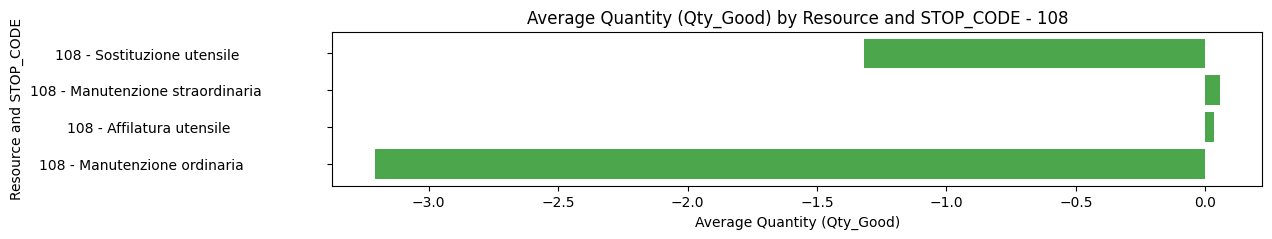

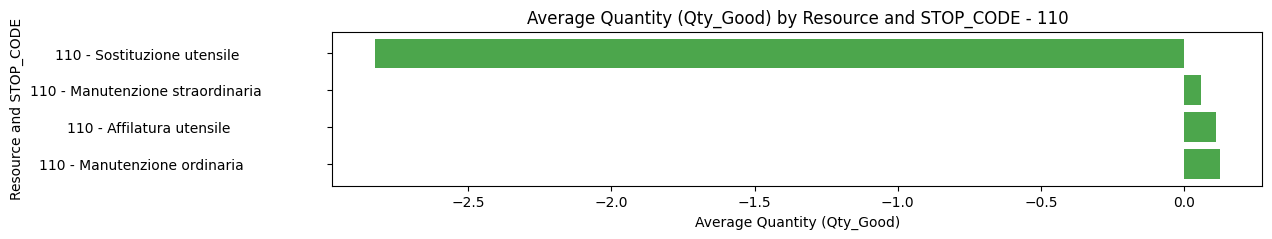

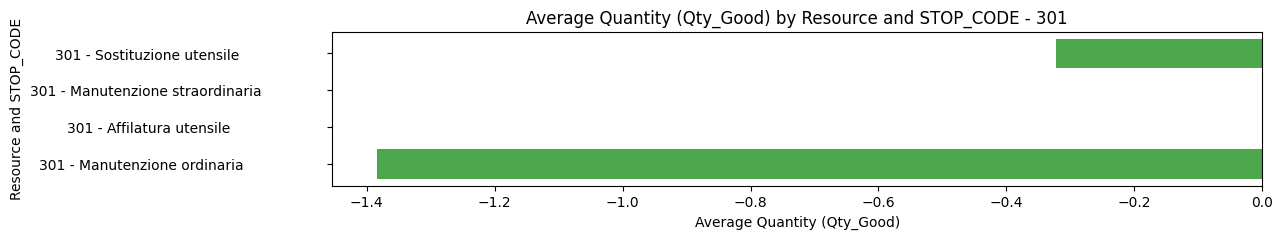

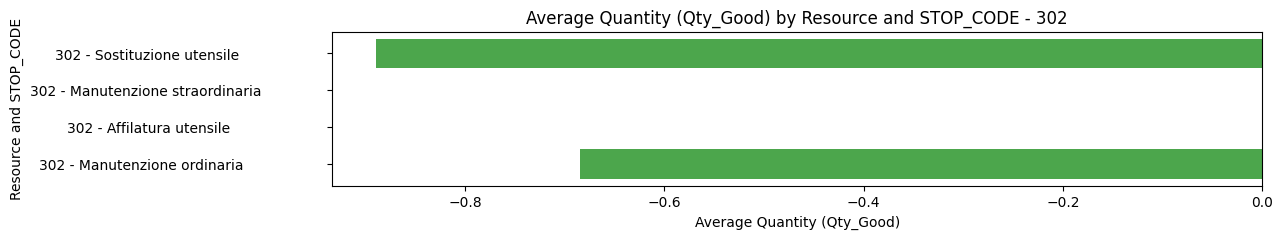

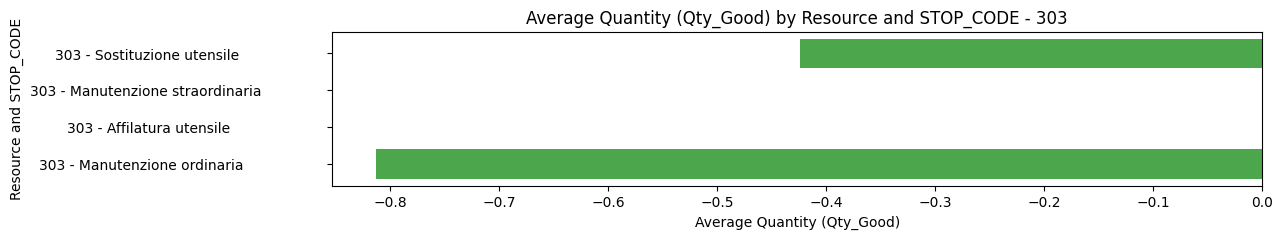

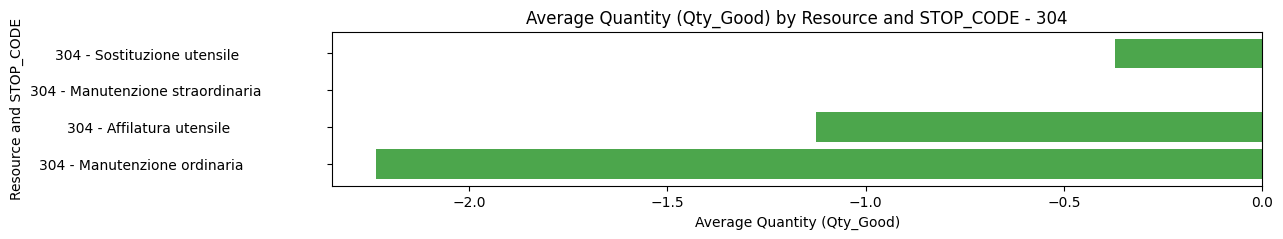

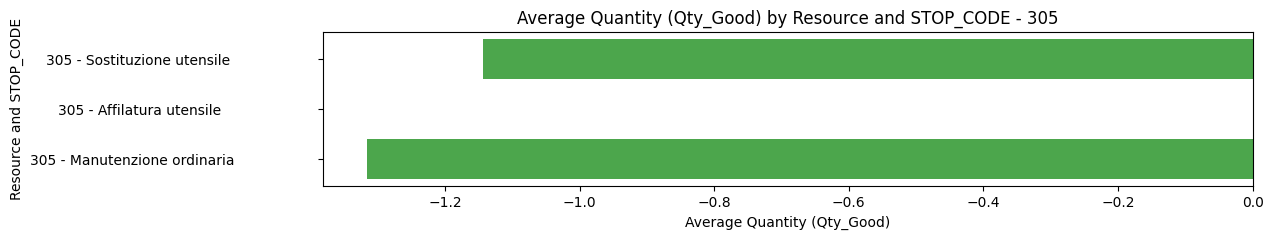

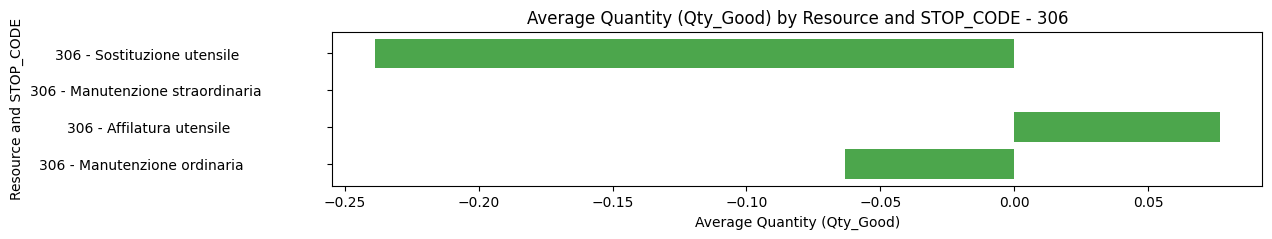

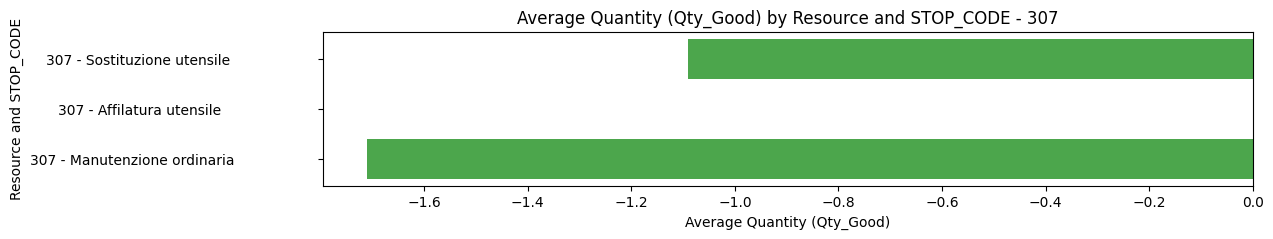

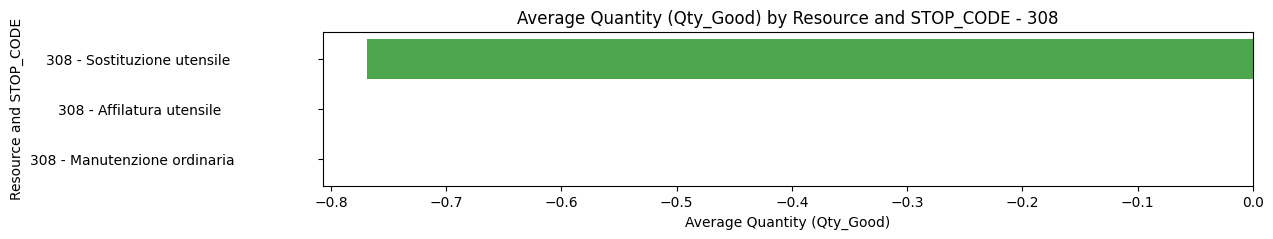

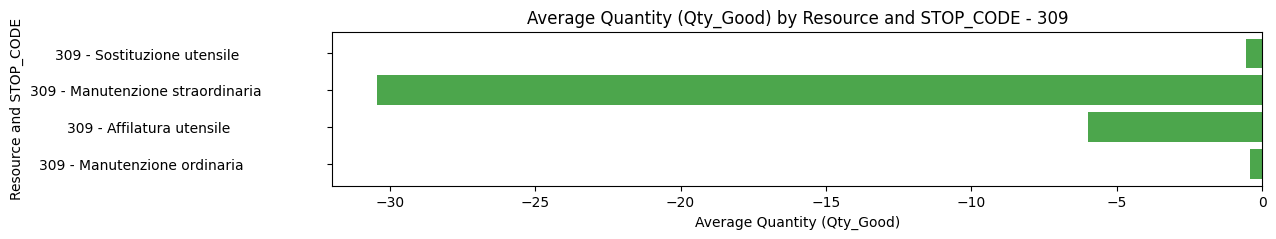

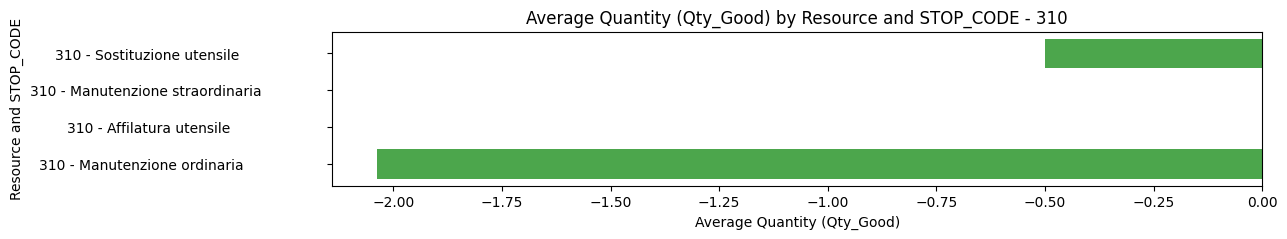

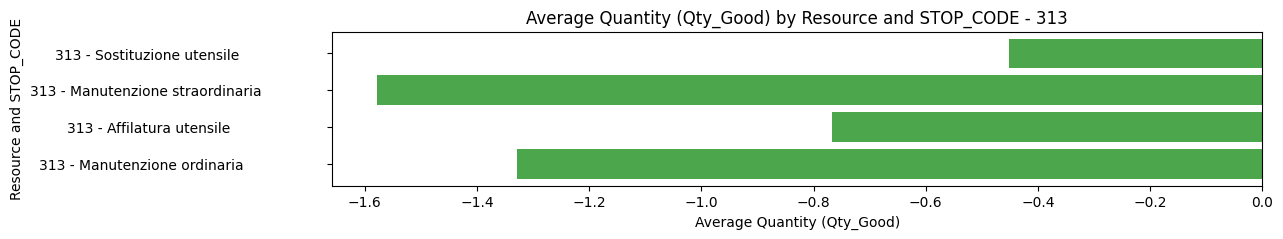

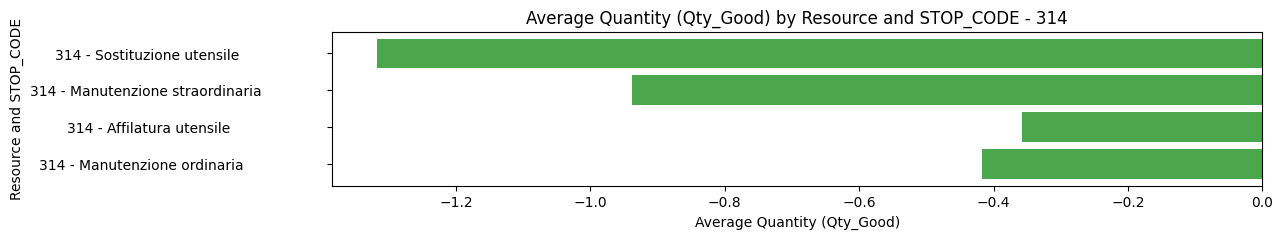

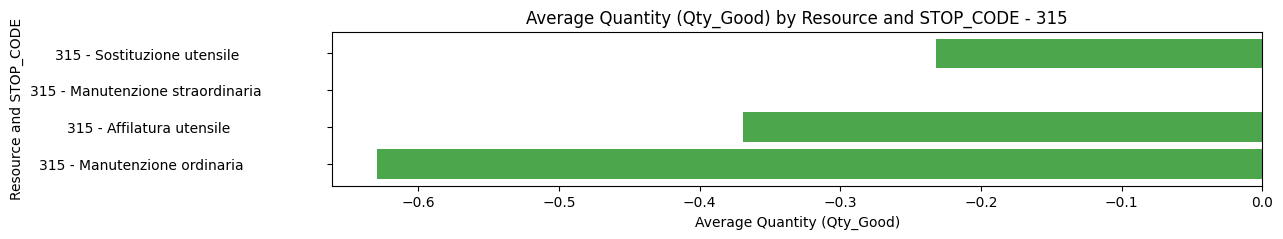

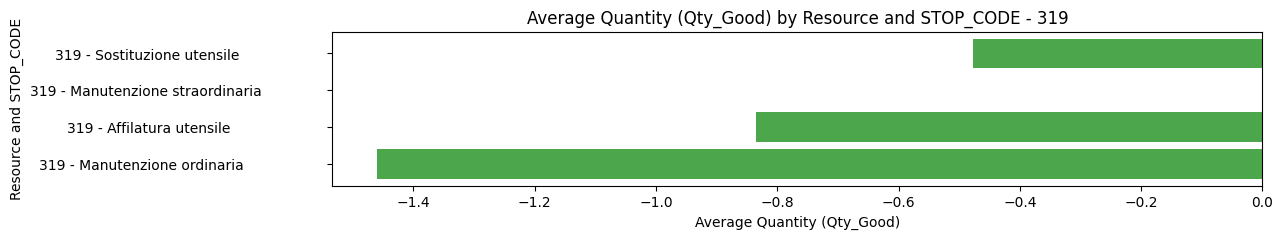

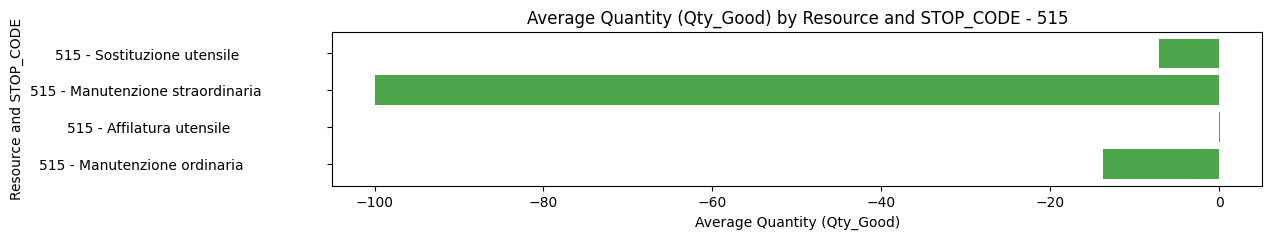

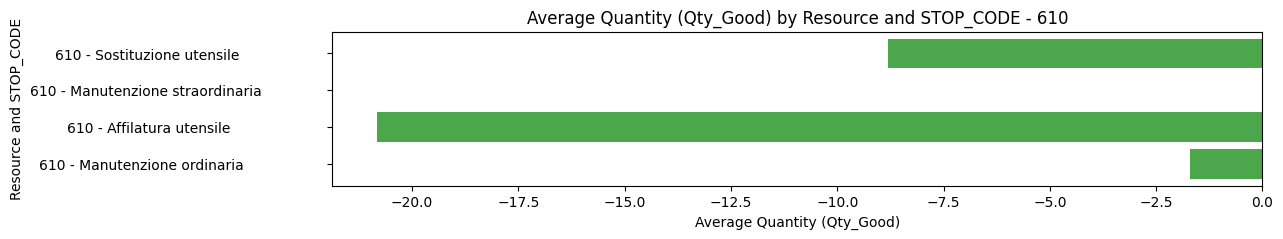

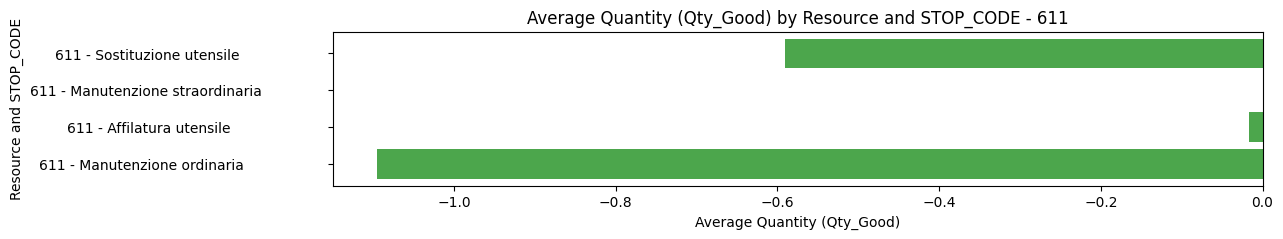

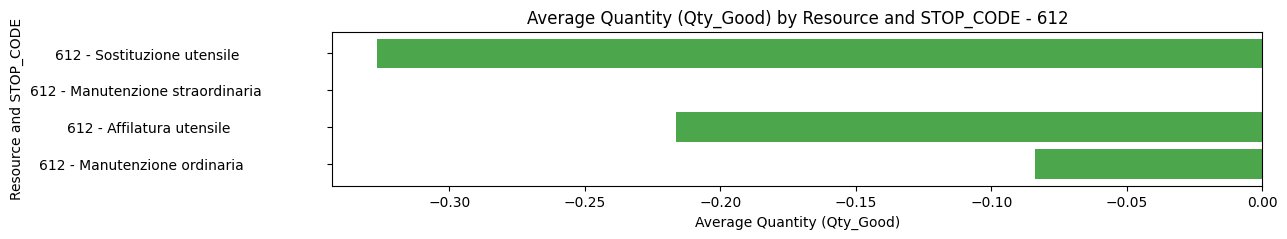

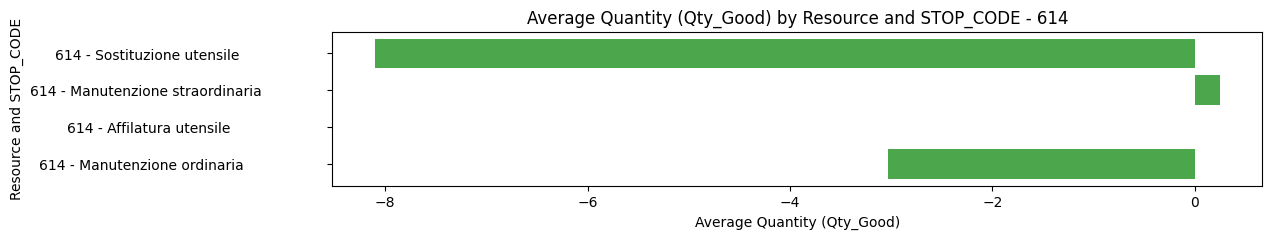

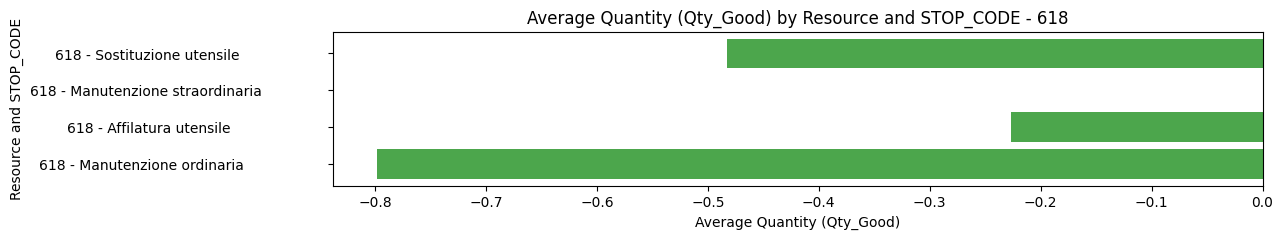

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', True)

energy_value_stats_filtered_reset = energy_value_stats.reset_index()

# Convert the 'RESOURCE' column to string format
energy_value_stats_filtered_reset['RESOURCE'] = energy_value_stats_filtered_reset['RESOURCE'].astype(str)

# Get unique resources
unique_resources = energy_value_stats_filtered_reset['RESOURCE'].unique()

# Set display options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', True)

# Plot graph for each resource
for resource in unique_resources:
    # Filter data for the current resource
    resource_data = energy_value_stats_filtered_reset[energy_value_stats_filtered_reset['RESOURCE'] == resource]

    # Create a graph for 'Avg Qty_Good' for each 'STOP_CODE' of the current resource
    plt.figure(figsize=(12, 2))
    plt.barh(resource_data['RESOURCE'] + ' - ' + resource_data['Description Stop_Code'],
             resource_data['Avg Qty_Good'], color='green', alpha=0.7, label='Avg Qty_Good')

    plt.xlabel('Average Quantity (Qty_Good)')
    plt.ylabel('Resource and STOP_CODE')
    plt.title(f'Average Quantity (Qty_Good) by Resource and STOP_CODE - {resource}')

    plt.show()